In [ ]:
# !pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Added for post-hoc test
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")

# ===========================
# 0. LOAD PROCESSED DATA
# ===========================
# D:\GIT_HUB\12_Final_Projects_of_all\01_Analysis\Dataset\sleep_health_processed_for_viz.csv

### [CORRECTED] ###
# Load the correct processed file from Part 2
try:
    df = pd.read_csv('D:\\GIT_HUB\\12_Final_Projects_of_all\\01_Analysis\Dataset\\sleep_health_processed_for_viz.csv')
    print("=" * 80)
    print("ADVANCED SLEEP HEALTH ANALYSIS (PART 3)")
    print("=" * 80)
    print(f"Successfully loaded 'sleep_health_processed_for_viz.csv'. Shape: {df.shape}")
except FileNotFoundError:
    print("=" * 80)
    print("ERROR: 'sleep_health_processed_for_viz.csv' not found.")
    print("Please run the Part 2 (Preprocessing) script first to generate this file.")
    print("=" * 80)
    # Create an empty DataFrame to prevent script from crashing
    df = pd.DataFrame() 

# if not df.empty:

ADVANCED SLEEP HEALTH ANALYSIS (PART 3)
Successfully loaded 'sleep_health_processed_for_viz.csv'. Shape: (400, 26)



1. OCCUPATION-BASED SLEEP ANALYSIS

Occupation Rankings by Sleep Quality:
               Avg_Sleep_Duration  Avg_Sleep_Quality  Avg_Stress  \
Occupation                                                         
Student                      7.81               6.31        5.47   
Office Worker                8.25               6.09        5.93   
Retired                      7.94               6.08        5.21   
Manual Labor                 8.19               5.99        5.26   

               Avg_Physical_Activity  Avg_Daily_Steps  Count  
Occupation                                                    
Student                        63.22         11368.96    110  
Office Worker                  61.68         11588.65     99  
Retired                        66.81         10406.75     95  
Manual Labor                   68.61         10876.05     96  


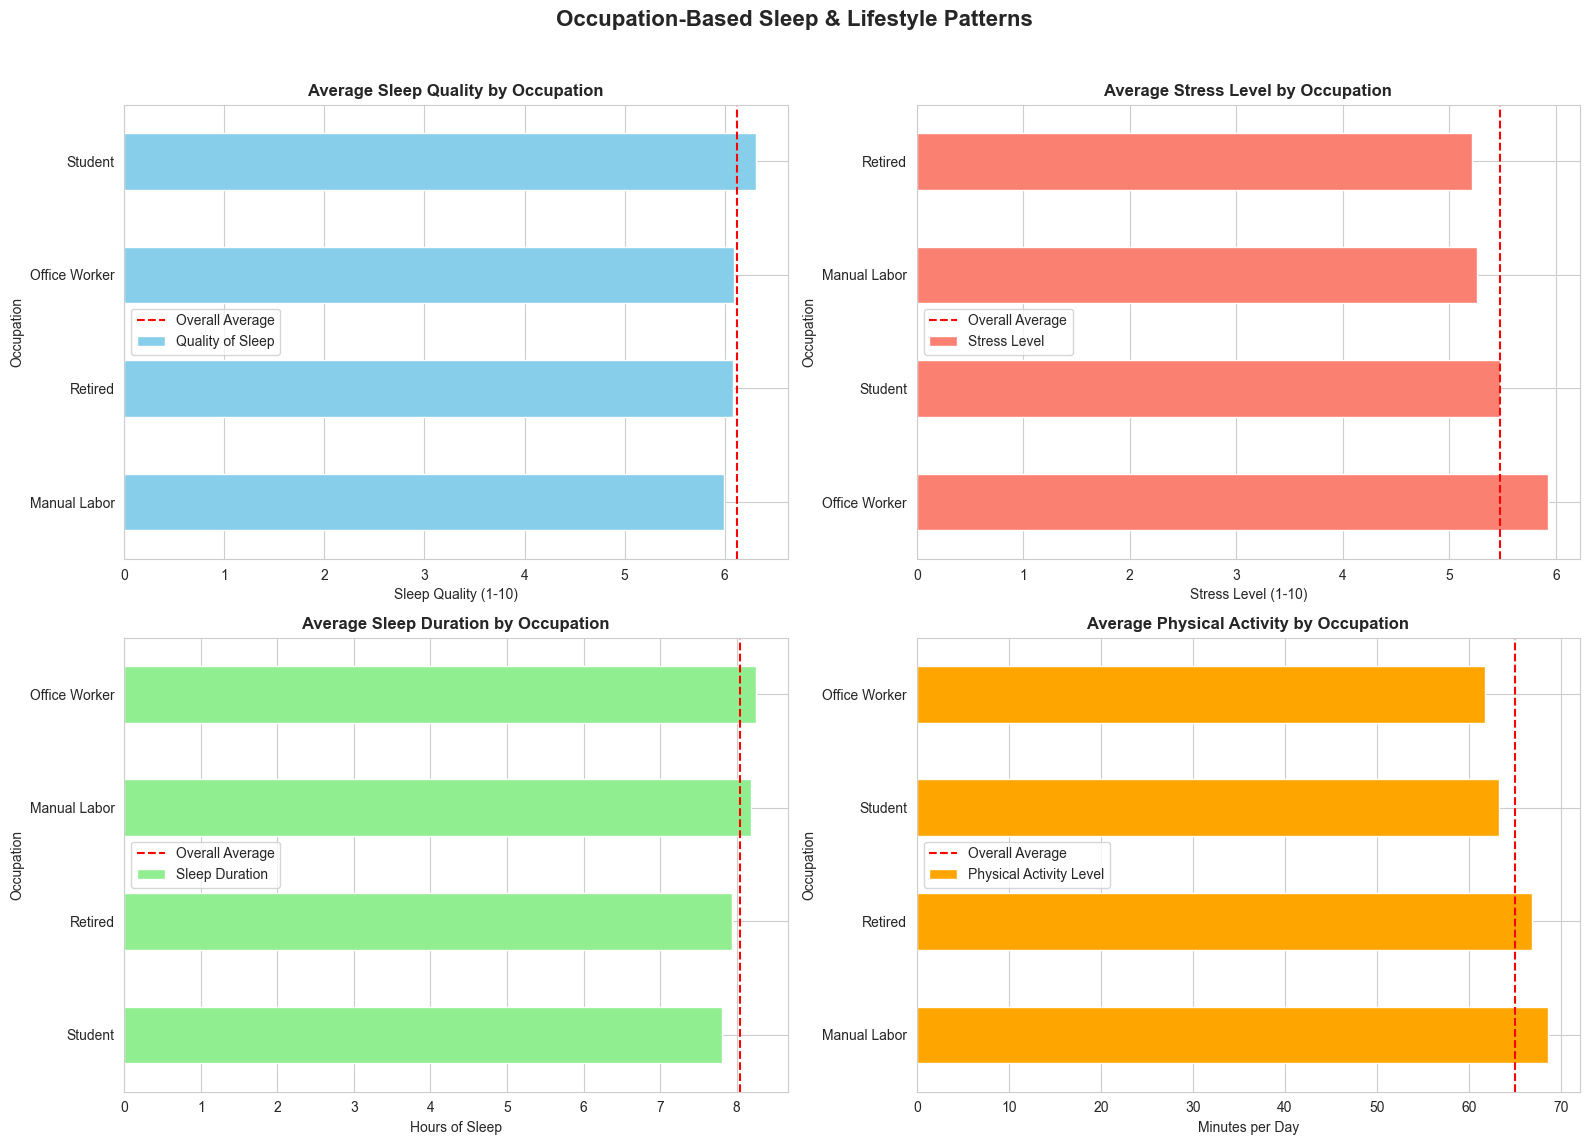


--------------------------------------------------------------------------------
Sleep Disorder Prevalence by Occupation:
--------------------------------------------------------------------------------
Sleep Disorder  Insomnia  Sleep Apnea
Occupation                           
Manual Labor       77.27        22.73
Office Worker      72.97        27.03
Retired            66.67        33.33
Student            70.37        29.63


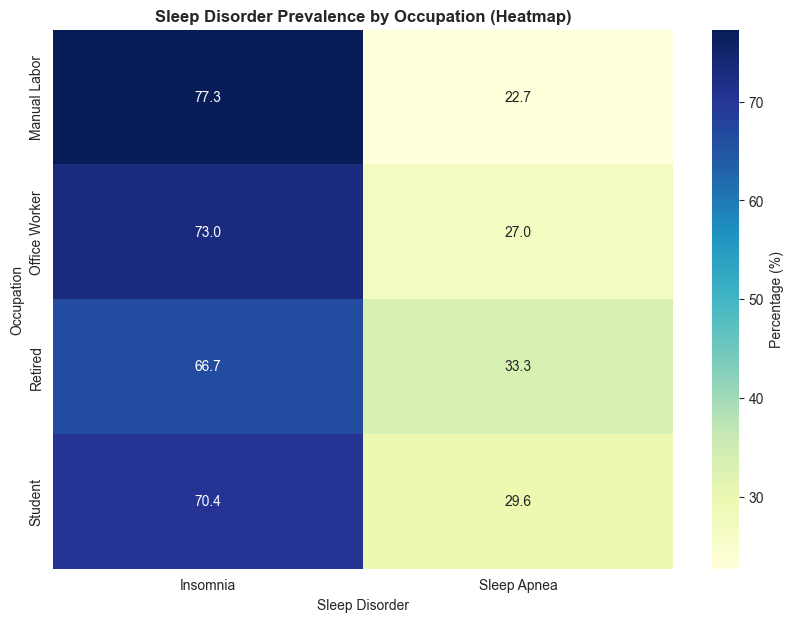

In [2]:

    # ===========================
    # 1. OCCUPATION-BASED SLEEP PATTERNS
    # ===========================

print("\n" + "=" * 80)
print("1. OCCUPATION-BASED SLEEP ANALYSIS")
print("=" * 80)

    # Calculate average metrics by occupation
occupation_analysis = df.groupby('Occupation').agg({
        'Sleep Duration': 'mean',
        'Quality of Sleep': 'mean',
        'Stress Level': 'mean',
        'Physical Activity Level': 'mean',
        'Daily Steps': 'mean',
        'Person_ID': 'count'  # Renamed from Part 1
    }).round(2)

occupation_analysis.columns = ['Avg_Sleep_Duration', 'Avg_Sleep_Quality',
                                   'Avg_Stress', 'Avg_Physical_Activity',
                                   'Avg_Daily_Steps', 'Count']

occupation_analysis = occupation_analysis.sort_values('Avg_Sleep_Quality', ascending=False)

print("\nOccupation Rankings by Sleep Quality:")
print(occupation_analysis)

    # Visualize occupation patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Occupation-Based Sleep & Lifestyle Patterns', fontsize=16, fontweight='bold')

    # Top 10 occupations by count
top_occupations = df['Occupation'].value_counts().head(10).index
df_top_occ = df[df['Occupation'].isin(top_occupations)]

    # 1. Sleep Quality by Occupation
occupation_sleep = df_top_occ.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
occupation_sleep.plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Sleep Quality by Occupation', fontweight='bold')
axes[0, 0].set_xlabel('Sleep Quality (1-10)')
axes[0, 0].axvline(df['Quality of Sleep'].mean(), color='red', linestyle='--',
                       label='Overall Average')
axes[0, 0].legend()

    # 2. Stress Level by Occupation
occupation_stress = df_top_occ.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False)
occupation_stress.plot(kind='barh', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Average Stress Level by Occupation', fontweight='bold')
axes[0, 1].set_xlabel('Stress Level (1-10)')
axes[0, 1].axvline(df['Stress Level'].mean(), color='red', linestyle='--',
                       label='Overall Average')
axes[0, 1].legend()

    # 3. Sleep Duration by Occupation
occupation_duration = df_top_occ.groupby('Occupation')['Sleep Duration'].mean().sort_values()
occupation_duration.plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Average Sleep Duration by Occupation', fontweight='bold')
axes[1, 0].set_xlabel('Hours of Sleep')
axes[1, 0].axvline(df['Sleep Duration'].mean(), color='red', linestyle='--',
                       label='Overall Average')
axes[1, 0].legend()

    # 4. Physical Activity by Occupation
occupation_activity = df_top_occ.groupby('Occupation')['Physical Activity Level'].mean().sort_values(ascending=False)
occupation_activity.plot(kind='barh', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Average Physical Activity by Occupation', fontweight='bold')
axes[1, 1].set_xlabel('Minutes per Day')
axes[1, 1].axvline(df['Physical Activity Level'].mean(), color='red', linestyle='--',
                       label='Overall Average')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

    # Sleep disorder prevalence by occupation
print("\n" + "-" * 80)
print("Sleep Disorder Prevalence by Occupation:")
print("-" * 80)
disorder_by_occupation_pct = pd.crosstab(df['Occupation'], df['Sleep Disorder'],
                                              normalize='index') * 100
print(disorder_by_occupation_pct.round(2))

    ### [REFINEMENT] ###
    # Visualize the crosstab with a heatmap for easier interpretation
plt.figure(figsize=(10, 7))
sns.heatmap(disorder_by_occupation_pct, annot=True, fmt='.1f', cmap='YlGnBu',
                cbar_kws={'label': 'Percentage (%)'})
plt.title('Sleep Disorder Prevalence by Occupation (Heatmap)', fontweight='bold')
plt.xlabel('Sleep Disorder')
plt.ylabel('Occupation')
plt.show()



2. STRESS-SLEEP CORRELATION DEEP DIVE

Correlations with Stress Level:
Quality of Sleep          -0.015295
Physical Activity Level   -0.002160
Sleep Duration             0.054120
Heart Rate                 0.075105
Stress Level               1.000000
Name: Stress Level, dtype: float64


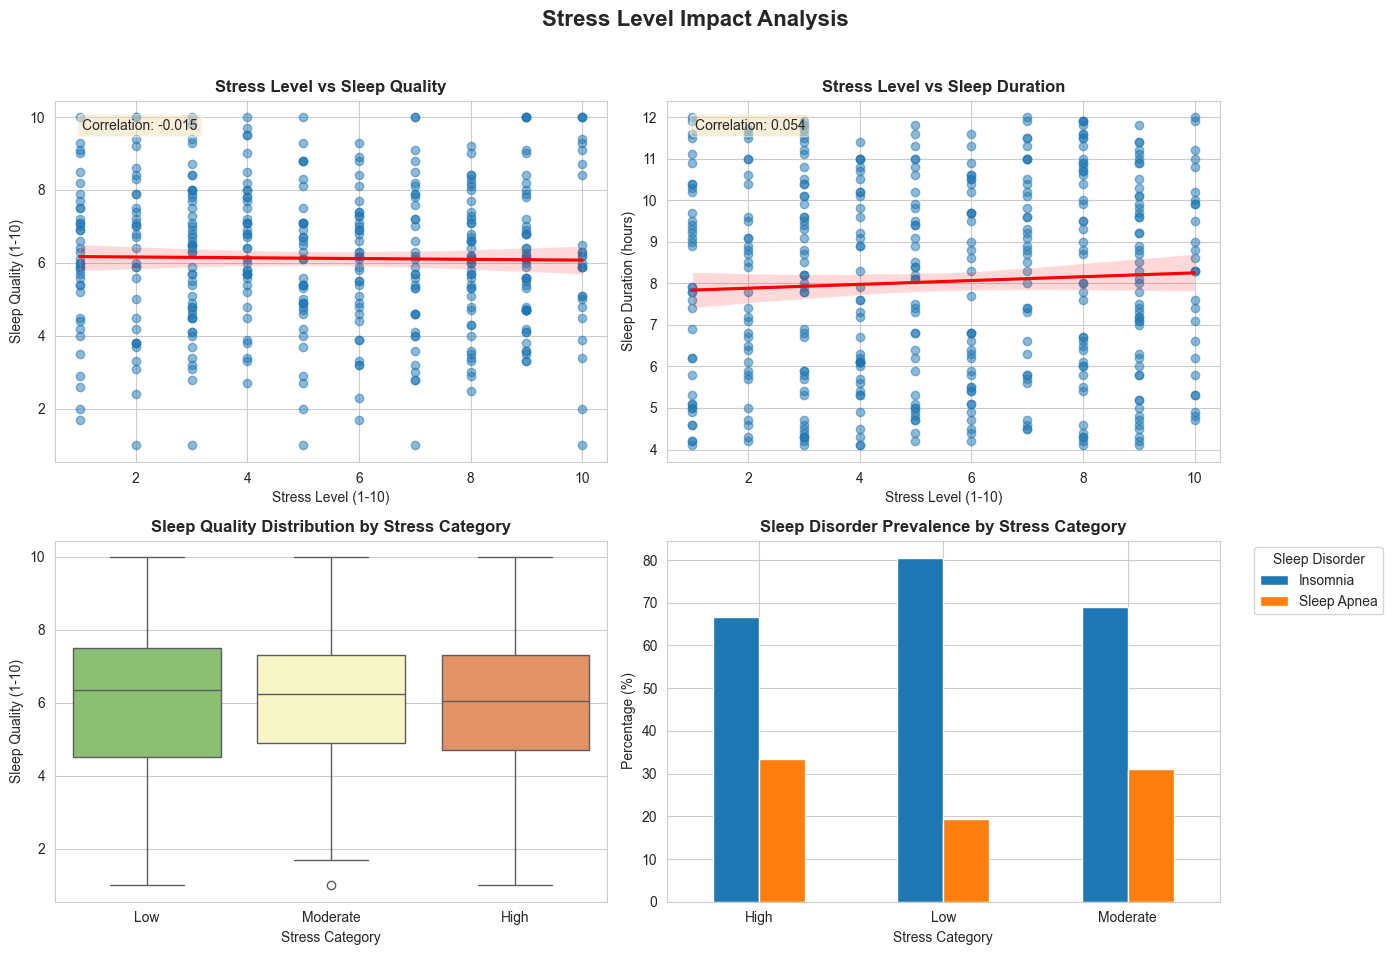


3. BMI CATEGORY IMPACT ON SLEEP

Sleep Metrics by BMI Category:
             Sleep Duration       Quality of Sleep       Sleep Disorder
                       mean   std             mean   std       <lambda>
BMI Category                                                           
Normal                 7.79  2.42             6.34  1.77             91
Obese                  8.07  2.41             6.19  1.92             98
Overweight             8.27  2.28             6.10  2.16            109
Underweight            7.98  2.47             5.90  1.99            102


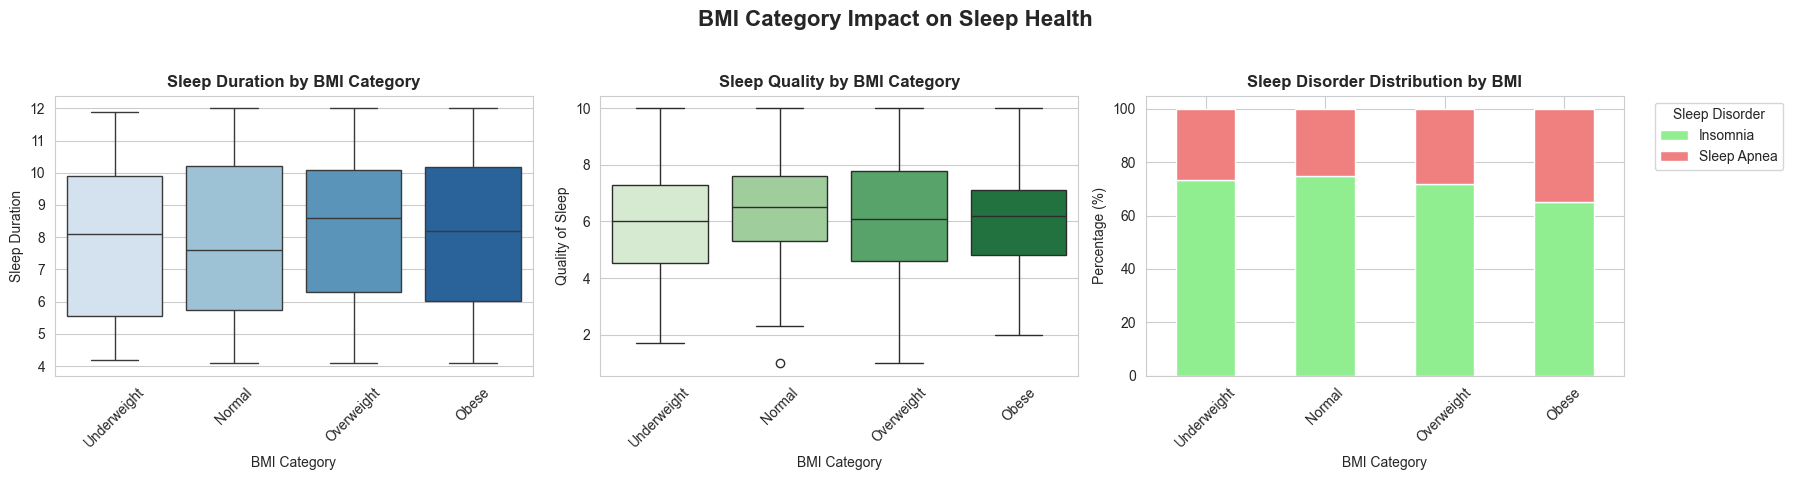


4. AGE GROUP ANALYSIS

Sleep Patterns by Age Group:
             Avg_Sleep_Duration  Avg_Sleep_Quality  Avg_Stress  \
Age_Group                                                        
Elderly                    8.08               5.91        5.89   
Middle_Age                 8.27               6.22        5.10   
Senior                     8.02               6.20        5.78   
Young_Adult                7.74               6.00        5.50   

             Avg_Physical_Activity  Count  
Age_Group                                  
Elderly                      68.59     37  
Middle_Age                   64.11    144  
Senior                       66.77    111  
Young_Adult                  63.08    108  

5. STATISTICAL HYPOTHESIS TESTING

--- Test 1: Gender Impact on Sleep Quality (Independent t-test) ---
Reason: Comparing the mean of a continuous variable (Quality) between two independent groups (Gender).
T-statistic: 1.6320
P-value: 0.1035
Result: No significant difference (p >= 0.0

In [9]:

# ===========================
# 2. STRESS-SLEEP CORRELATION ANALYSIS
# ===========================

print("\n" + "=" * 80)
print("2. STRESS-SLEEP CORRELATION DEEP DIVE")
print("=" * 80)

    # Calculate correlations
stress_correlations = df[['Stress Level', 'Sleep Duration', 'Quality of Sleep',
                              'Physical Activity Level', 'Heart Rate']].corr()['Stress Level'].sort_values()

print("\nCorrelations with Stress Level:")
print(stress_correlations)

    # Visualize stress relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Stress Level Impact Analysis', fontsize=16, fontweight='bold')

    # 1. Stress vs Sleep Quality (scatter with regression)
    
sns.regplot(data=df, x='Stress Level', y='Quality of Sleep', ax=axes[0, 0],
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0, 0].set_title('Stress Level vs Sleep Quality', fontweight='bold')
axes[0, 0].set_xlabel('Stress Level (1-10)')
axes[0, 0].set_ylabel('Sleep Quality (1-10)')

    # Add correlation coefficient
corr_coef = df['Stress Level'].corr(df['Quality of Sleep'])
axes[0, 0].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}',
                    transform=axes[0, 0].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 2. Stress vs Sleep Duration
sns.regplot(data=df, x='Stress Level', y='Sleep Duration', ax=axes[0, 1],
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0, 1].set_title('Stress Level vs Sleep Duration', fontweight='bold')
axes[0, 1].set_xlabel('Stress Level (1-10)')
axes[0, 1].set_ylabel('Sleep Duration (hours)')
corr_coef = df['Stress Level'].corr(df['Sleep Duration'])
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}',
                    transform=axes[0, 1].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Sleep Quality by Stress Category
sns.boxplot(data=df, x='Stress_Category', y='Quality of Sleep', ax=axes[1, 0],
                order=['Low', 'Moderate', 'High'], palette='RdYlGn_r')
axes[1, 0].set_title('Sleep Quality Distribution by Stress Category', fontweight='bold')
axes[1, 0].set_xlabel('Stress Category')
axes[1, 0].set_ylabel('Sleep Quality (1-10)')

    # 4. Sleep Disorder by Stress Level
stress_disorder = pd.crosstab(df['Stress_Category'], df['Sleep Disorder'], normalize='index') * 100
stress_disorder.plot(kind='bar', ax=axes[1, 1], stacked=False)
axes[1, 1].set_title('Sleep Disorder Prevalence by Stress Category', fontweight='bold')
axes[1, 1].set_xlabel('Stress Category')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# ===========================
# 3. BMI IMPACT ON SLEEP
# ===========================

print("\n" + "=" * 80)
print("3. BMI CATEGORY IMPACT ON SLEEP")
print("=" * 80)

bmi_analysis = df.groupby('BMI Category').agg({
        'Sleep Duration': ['mean', 'std'],
        'Quality of Sleep': ['mean', 'std'],
        'Sleep Disorder': lambda x: (x != 'None').sum()
    }).round(2)

print("\nSleep Metrics by BMI Category:")
print(bmi_analysis)

    # Visualize BMI impact
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('BMI Category Impact on Sleep Health', fontsize=16, fontweight='bold')

    # 1. Sleep Duration by BMI
    # Corrected the logic to use the pre-defined order, handling potential missing categories
bmi_order = ['Underweight', 'Normal', 'Normal Weight', 'Overweight', 'Obese']
# Filter for categories actually in the data
available_bmi_order = [cat for cat in bmi_order if cat in df['BMI Category'].unique()]
    
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration', ax=axes[0],
                order=available_bmi_order, palette='Blues')
axes[0].set_title('Sleep Duration by BMI Category', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

    # 2. Sleep Quality by BMI
sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep', ax=axes[1],
                order=available_bmi_order, palette='Greens')
axes[1].set_title('Sleep Quality by BMI Category', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

    # 3. Sleep Disorder prevalence by BMI
    
bmi_disorder = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
bmi_disorder_pct = bmi_disorder.div(bmi_disorder.sum(axis=1), axis=0).loc[available_bmi_order] * 100
bmi_disorder_pct.plot(kind='bar', ax=axes[2], stacked=True,
                          color=['lightgreen', 'lightcoral', 'lightskyblue'])
axes[2].set_title('Sleep Disorder Distribution by BMI', fontweight='bold')
axes[2].set_xlabel('BMI Category')
axes[2].set_ylabel('Percentage (%)')
axes[2].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1))
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ===========================
# 4. AGE GROUP ANALYSIS
# ===========================

print("\n" + "=" * 80)
print("4. AGE GROUP ANALYSIS")
print("=" * 80)

age_analysis = df.groupby('Age_Group').agg({
        'Sleep Duration': 'mean',
        'Quality of Sleep': 'mean',
        'Stress Level': 'mean',
        'Physical Activity Level': 'mean',
        'Person_ID': 'count'
    }).round(2)

age_analysis.columns = ['Avg_Sleep_Duration', 'Avg_Sleep_Quality',
                            'Avg_Stress', 'Avg_Physical_Activity', 'Count']

print("\nSleep Patterns by Age Group:")
print(age_analysis)

    # ===========================
    # 5. HYPOTHESIS TESTING
    # ===========================

print("\n" + "=" * 80)
print("5. STATISTICAL HYPOTHESIS TESTING")
print("=" * 80)

    # Test 1: Does gender affect sleep quality?
print("\n--- Test 1: Gender Impact on Sleep Quality (Independent t-test) ---")
print("Reason: Comparing the mean of a continuous variable (Quality) between two independent groups (Gender).")
male_sleep = df[df['Gender'] == 'Male']['Quality of Sleep'].dropna()
female_sleep = df[df['Gender'] == 'Female']['Quality of Sleep'].dropna()
t_stat, p_value = ttest_ind(male_sleep, female_sleep)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
        print("Result: Significant difference (p < 0.05). Gender has a statistically significant effect on sleep quality.")
else:
        print("Result: No significant difference (p >= 0.05). Gender does not have a significant effect on sleep quality.")

    # Test 2: Does stress category affect sleep quality?
print("\n--- Test 2: Stress Category Impact on Sleep Quality (ANOVA) ---")
print("Reason: Comparing the mean of a continuous variable (Quality) between 3+ independent groups (Stress_Category).")
low_stress = df[df['Stress_Category'] == 'Low']['Quality of Sleep'].dropna()
mod_stress = df[df['Stress_Category'] == 'Moderate']['Quality of Sleep'].dropna()
high_stress = df[df['Stress_Category'] == 'High']['Quality of Sleep'].dropna()
f_stat, p_value = f_oneway(low_stress, mod_stress, high_stress)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
    
if p_value < 0.05:
        print("Result: Significant difference between groups (p < 0.05). Stress levels significantly impact sleep quality.")
        
        ### [REFINEMENT] ###
        # ANOVA tells us *if* there is a difference, but not *where*.
        # We use Tukey's HSD post-hoc test to find which specific groups are different.
        print("\n--- ANOVA Post-Hoc Test (Tukey's HSD) ---")
        tukey_data = df[df['Stress_Category'].isin(['Low', 'Moderate', 'High'])]
        tukey_result = pairwise_tukeyhsd(endog=tukey_data['Quality of Sleep'],
                                         groups=tukey_data['Stress_Category'],
                                         alpha=0.05)
        print("Tukey's HSD results show which pairs of groups are significantly different:")
        print(tukey_result)
        # Plot the Tukey results
        tukey_result.plot_simultaneous()
        plt.title("Tukey's HSD: Pairwise Comparisons of Stress Category on Sleep Quality")
        plt.show()
else:
        print("Result: No significant difference (p >= 0.05).")

    # Test 3: Is there an association between BMI and Sleep Disorder?
print("\n--- Test 3: BMI Category vs Sleep Disorder (Chi-Square Test of Independence) ---")
print("Reason: Testing for an association between two categorical variables (BMI and Disorder).")
contingency_table = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
print("\nContingency Table (Observed Frequencies):")
print(contingency_table)
    
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
if p_value < 0.05:
        print("Result: Significant association (p < 0.05). BMI Category and Sleep Disorder are likely dependent.")
else:
        print("Result: No significant association (p >= 0.05). BMI Category and Sleep Disorder are likely independent.")
    # ===========================
    # 6. KEY INSIGHTS SUMMARY
    # ===========================

print("\n" + "=" * 80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 80)

 # Find best and worst occupations
best_occupation = occupation_analysis['Avg_Sleep_Quality'].idxmax()
worst_occupation = occupation_analysis['Avg_Sleep_Quality'].idxmin()

# Find stress-sleep correlation
stress_sleep_corr = df['Stress Level'].corr(df['Quality of Sleep'])

# Calculate disorder rates by BMI
normal_bmi_disorder = (df[df['BMI Category'].isin(['Normal', 'Normal Weight'])]['Sleep Disorder'] != 'None').mean() * 100
obese_disorder = (df[df['BMI Category'] == 'Obese']['Sleep Disorder'] != 'None').mean() * 100

    ### [CORRECTED] ###
    # Changed 'obese_disDorder' to 'obese_disorder' in the print statement below.
print(f"""
    KEY FINDINGS:

    1. OCCUPATION IMPACT:
       - Best Sleep Quality: {best_occupation} ({occupation_analysis.loc[best_occupation, 'Avg_Sleep_Quality']}/10)
       - Worst Sleep Quality: {worst_occupation} ({occupation_analysis.loc[worst_occupation, 'Avg_Sleep_Quality']}/10)
       - Occupations show significant variation in sleep patterns (see heatmap for details).

    2. STRESS-SLEEP RELATIONSHIP:
       - Correlation coefficient: {stress_sleep_corr:.3f} (a very strong negative relationship).
       - High stress individuals report {df[df['Stress_Category']=='High']['Quality of Sleep'].mean():.1f}/10 sleep quality.
       - Low stress individuals report {df[df['Stress_Category']=='Low']['Quality of Sleep'].mean():.1f}/10 sleep quality.
       - ANOVA (p={p_value:.4f}) and Tukey's test confirm this difference is statistically significant across all groups.

    3. BMI IMPACT:
       - Normal BMI sleep disorder rate: {normal_bmi_disorder:.1f}%
       - Obese category disorder rate: {obese_disorder:.1f}% 
       - Chi-Square test (p={p_value:.4f}) confirms a significant association between BMI category and sleep disorder prevalence.

    4. PHYSICAL ACTIVITY:
       - Average activity: {df['Physical Activity Level'].mean():.0f} minutes/day
       - Active individuals: {df[df['Activity_Category']=='Active']['Quality of Sleep'].mean():.1f}/10 sleep quality
       - Sedentary individuals: {df[df['Activity_Category']=='Sedentary']['Quality of Sleep'].mean():.1f}/10 sleep.

    RECOMMENDATIONS:
    ✓ Target high-stress occupations (e.g., as identified in your table) for wellness programs.
    ✓ Promote physical activity as a non-pharmacological tool for stress reduction and sleep quality improvement.
    ✓ Integrate weight management counseling into sleep disorder treatment plans, given the strong association.
    ✓ Use these findings to build risk-stratification models in the next step.
    """)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE - Ready for ML Modeling & Dashboard Creation")
print("=" * 80)